In [6]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import xarray as xr

from pymc import HalfCauchy, Model, Normal, sample

print(f"Running on PyMC v{pm.__version__}")

import bambi as bmb

Running on PyMC v5.13.0


In [2]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [3]:
size = 200
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + rng.normal(scale=0.5, size=size)

data = pd.DataFrame(dict(x=x, y=y))

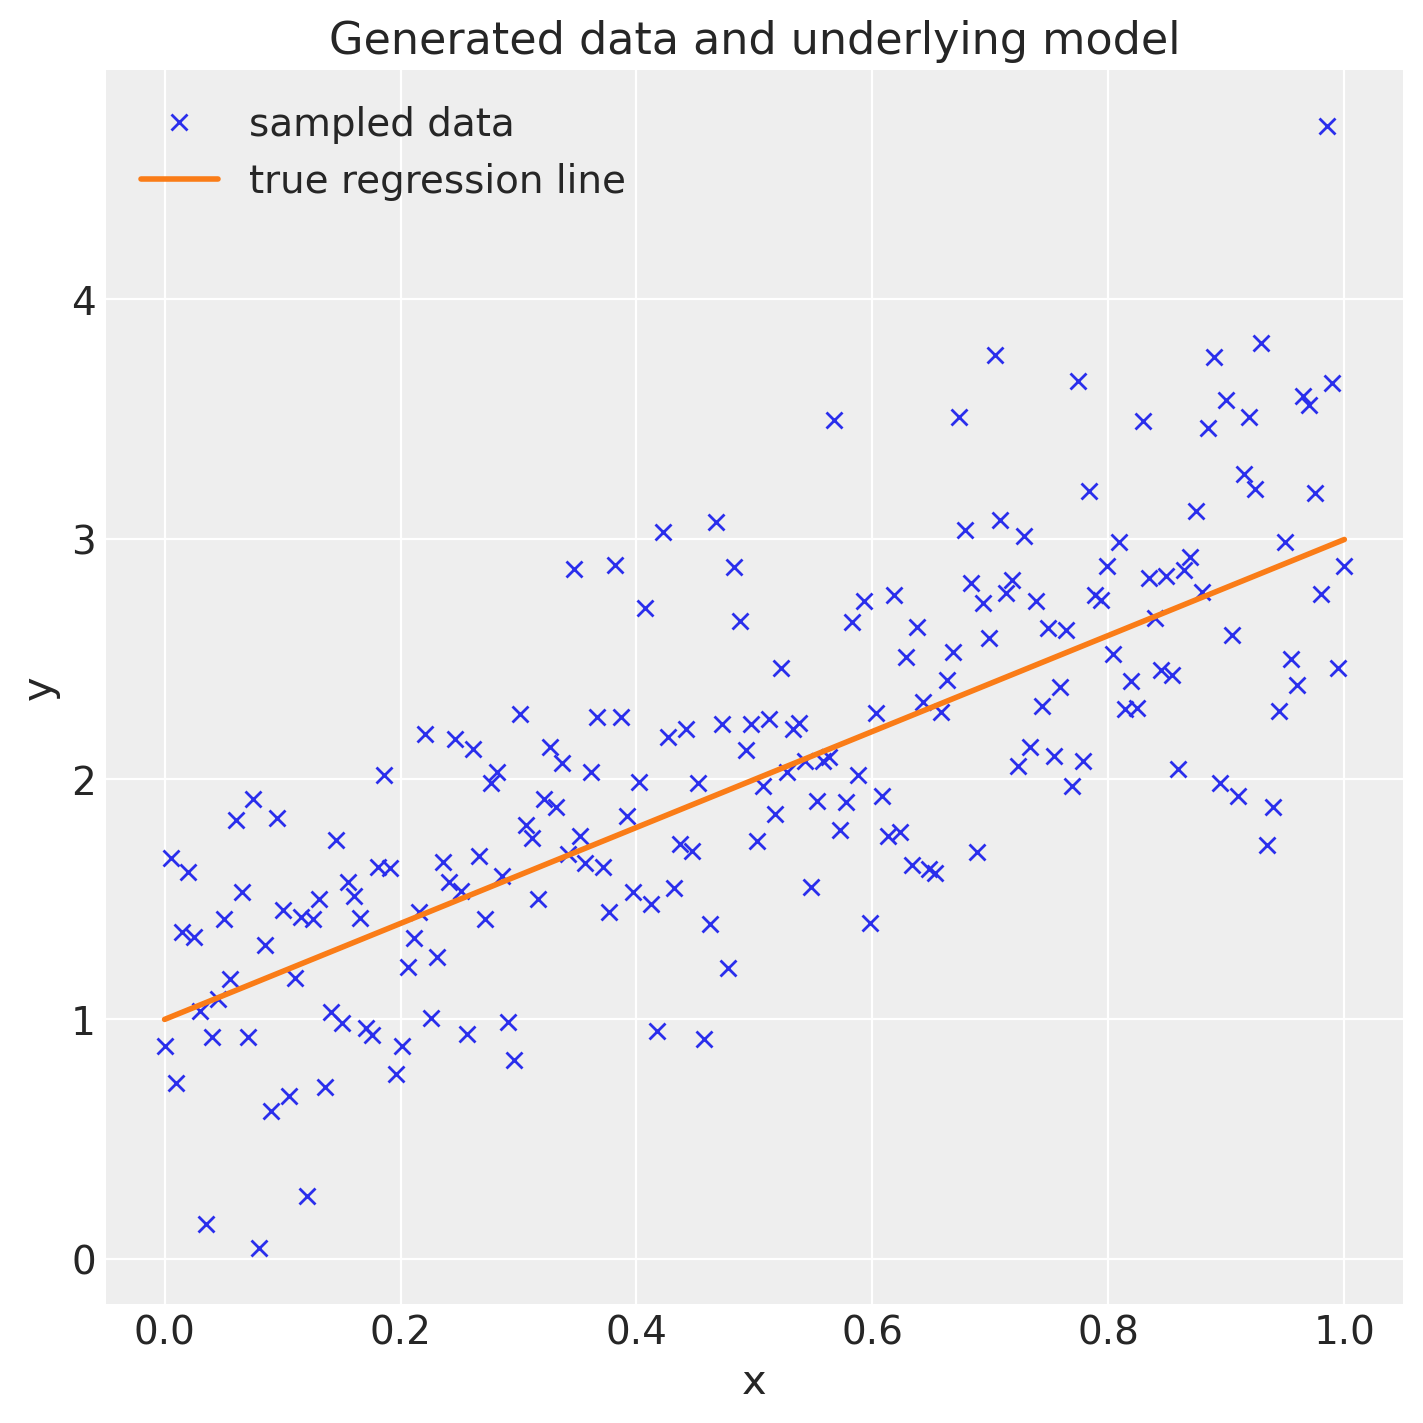

In [4]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel="x", ylabel="y", title="Generated data and underlying model")
ax.plot(x, y, "x", label="sampled data")
ax.plot(x, true_regression_line, label="true regression line", lw=2.0)
plt.legend(loc=0);

In [5]:
with Model() as model:  # model specifications in PyMC are wrapped in a with-statement
    # Define priors
    sigma = HalfCauchy("sigma", beta=10)
    intercept = Normal("Intercept", 0, sigma=20)
    slope = Normal("slope", 0, sigma=20)

    # Define likelihood
    likelihood = Normal("y", mu=intercept + slope * x, sigma=sigma, observed=y)

    # Inference!
    # draw 3000 posterior samples using NUTS sampling
    idata = sample(3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 2 seconds.


In [7]:
model = bmb.Model("y ~ x", data)
idata = model.fit(draws=3000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [y_sigma, Intercept, x]


Output()

Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y_sigma'}>,
        <Axes: title={'center': 'y_sigma'}>]], dtype=object)

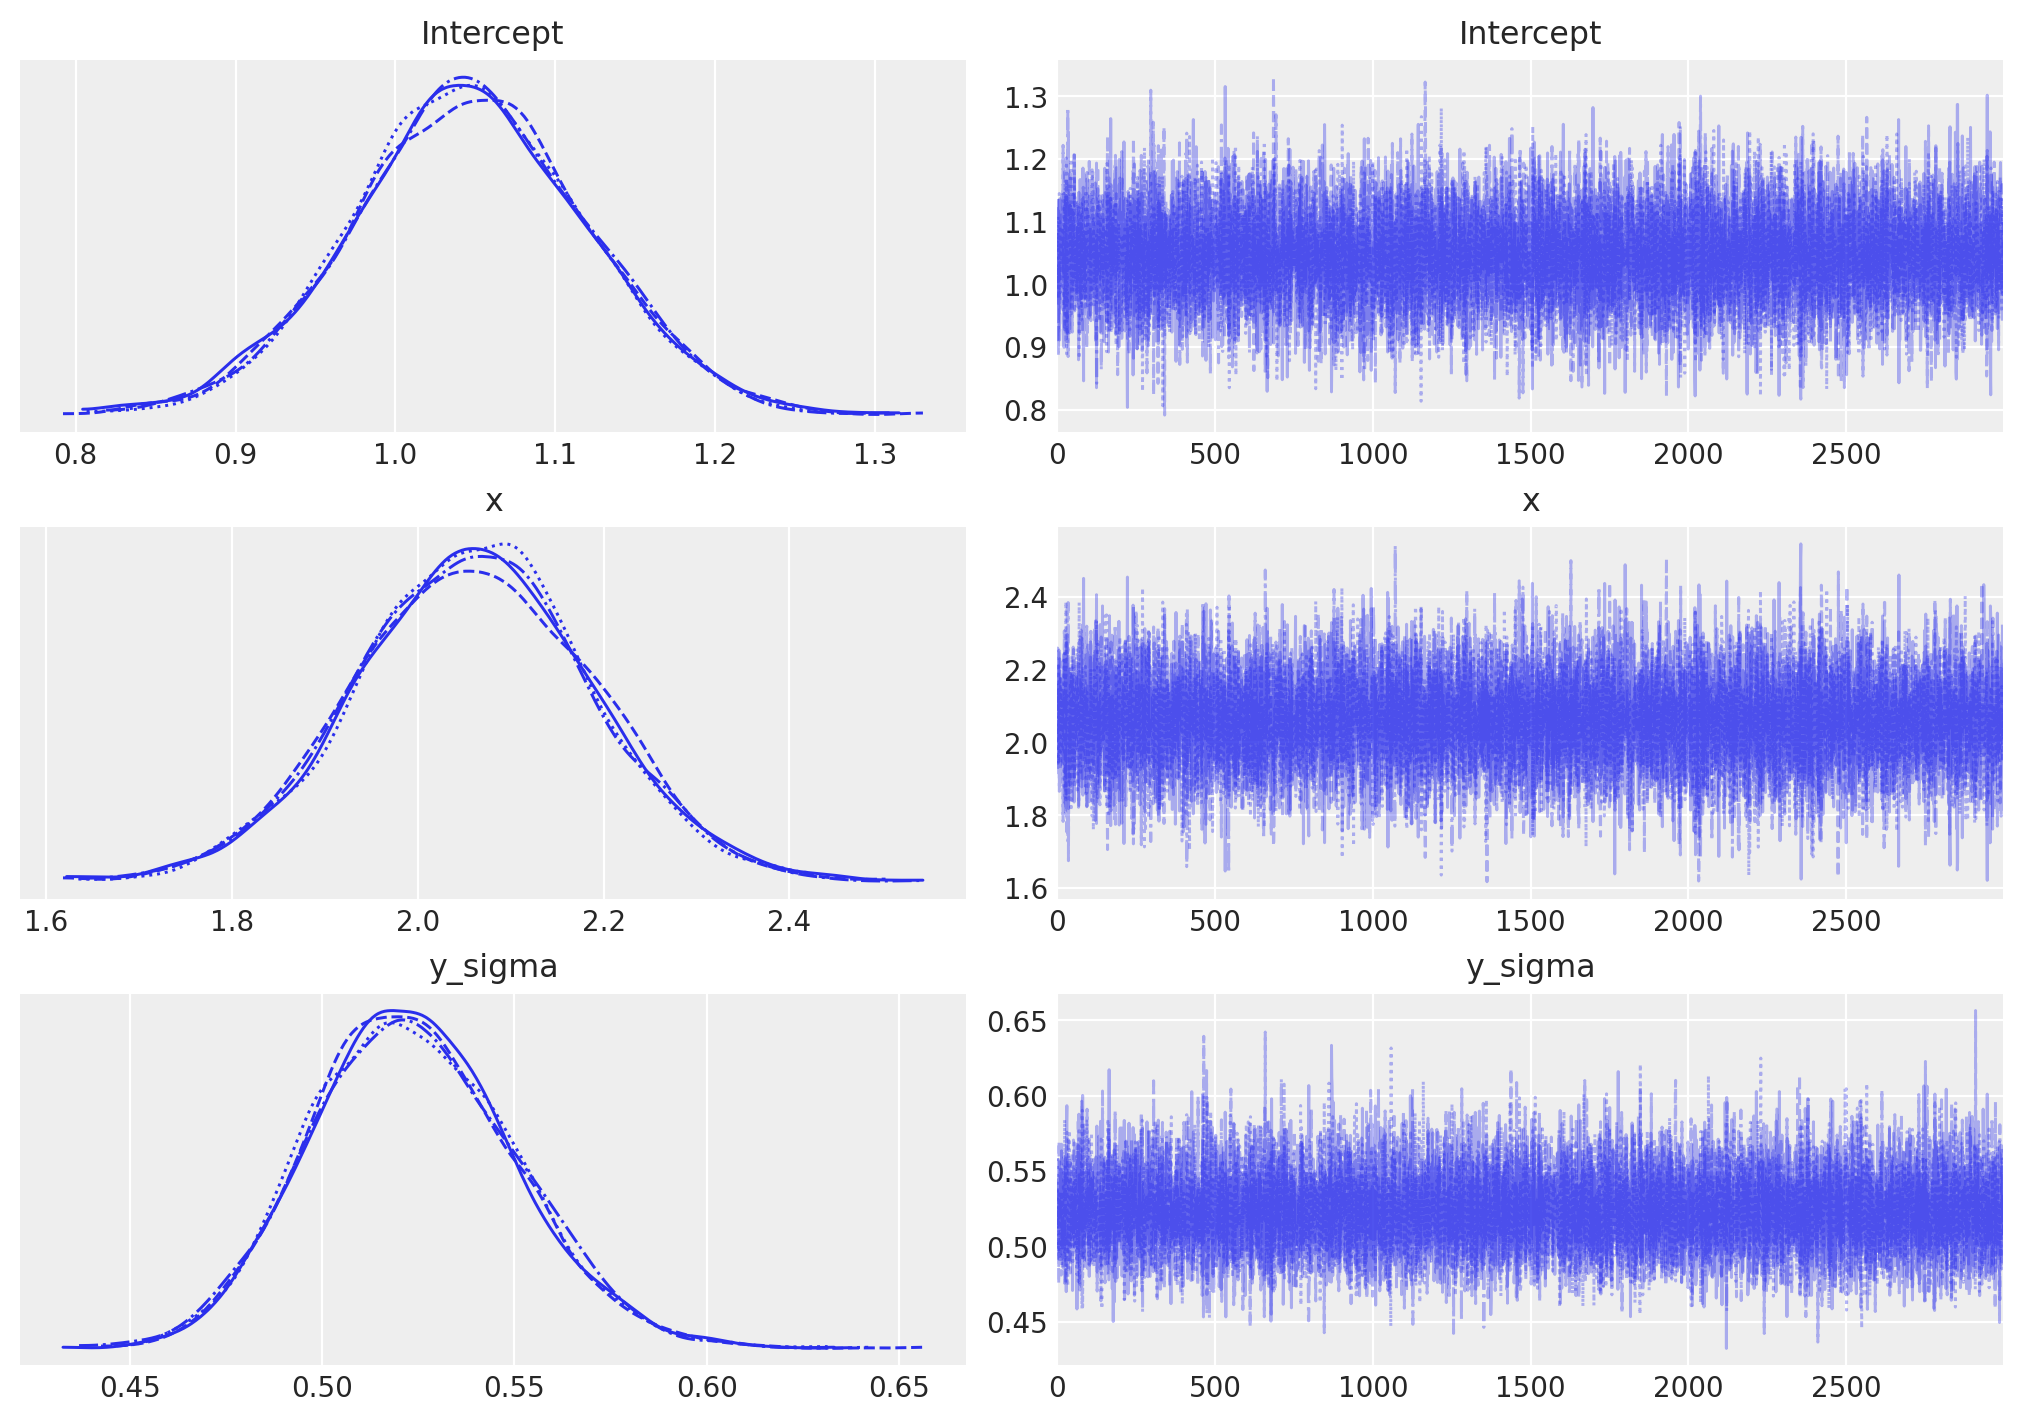

In [8]:
az.plot_trace(idata, figsize = (10,7))

In [17]:
idata.posterior["y_model"]

<xarray.DataArray 'y_model' (chain: 4, draw: 3000, dim_0: 200)> Size: 19MB
array([[[1.09717038, 1.1072366 , 1.11730283, ..., 3.08021627,
         3.0902825 , 3.10034872],
        [0.9115793 , 0.92292932, 0.93427934, ..., 3.14753388,
         3.1588839 , 3.17023393],
        [1.120969  , 1.13067018, 1.14037137, ..., 3.03210167,
         3.04180286, 3.05150404],
        ...,
        [1.00678593, 1.0177201 , 1.02865426, ..., 3.16081618,
         3.17175034, 3.1826845 ],
        [0.98361949, 0.99352291, 1.00342633, ..., 2.93459331,
         2.94449673, 2.95440015],
        [1.10103349, 1.11096089, 1.12088829, ..., 3.05673101,
         3.06665841, 3.0765858 ]],

       [[1.01026546, 1.02101467, 1.03176388, ..., 3.12785954,
         3.13860875, 3.14935796],
        [0.98738596, 0.99755892, 1.00773188, ..., 2.99145894,
         3.0016319 , 3.01180486],
        [1.10847248, 1.11823293, 1.12799339, ..., 3.03128198,
         3.04104244, 3.05080289],
...
        [1.09020629, 1.10069968, 1.11119307, ..., 3.1574044 ,
         3.16789779, 3.17839118],
        [1.07932147, 1.08966748, 1.10001348, ..., 3.11748462,
         3.12783063, 3.13817663],
        [1.11599535, 1.1262269 , 1.13645845, ..., 3.13161081,
         3.14184236, 3.15207391]],

       [[1.08138005, 1.09099234, 1.10060463, ..., 2.97500113,
         2.98461342, 2.99422571],
        [1.01139905, 1.02246261, 1.03352616, ..., 3.19091959,
         3.20198314, 3.2130467 ],
        [0.97643508, 0.98714828, 0.99786148, ..., 3.08693598,
         3.09764918, 3.10836239],
        ...,
        [0.95450568, 0.96576764, 0.9770296 , ..., 3.17311164,
         3.1843736 , 3.19563556],
        [1.07324838, 1.08352365, 1.09379892, ..., 3.0974774 ,
         3.10775268, 3.11802795],
        [1.04446746, 1.05488113, 1.06529481, ..., 3.09596101,
         3.10637468, 3.11678835]]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 24kB 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Dimensions without coordinates: dim_0

In [14]:
idata.posterior["x"] * xr.DataArray(x)

<xarray.DataArray (chain: 4, draw: 3000, dim_0: 200)> Size: 19MB
array([[[0.        , 0.01006622, 0.02013245, ..., 1.98304589,
         1.99311211, 2.00317834],
        [0.        , 0.01135002, 0.02270005, ..., 2.23595458,
         2.24730461, 2.25865463],
        [0.        , 0.00970118, 0.01940236, ..., 1.91113267,
         1.92083385, 1.93053503],
        ...,
        [0.        , 0.01093416, 0.02186833, ..., 2.15403024,
         2.16496441, 2.17589857],
        [0.        , 0.00990342, 0.01980684, ..., 1.95097382,
         1.96087725, 1.97078067],
        [0.        , 0.0099274 , 0.0198548 , ..., 1.95569752,
         1.96562492, 1.97555232]],

       [[0.        , 0.01074921, 0.02149842, ..., 2.11759408,
         2.12834329, 2.1390925 ],
        [0.        , 0.01017296, 0.02034592, ..., 2.00407298,
         2.01424594, 2.0244189 ],
        [0.        , 0.00976045, 0.01952091, ..., 1.92280951,
         1.93256996, 1.94233041],
...
        [0.        , 0.01049339, 0.02098678, ..., 2.06719811,
         2.0776915 , 2.08818489],
        [0.        , 0.01034601, 0.02069201, ..., 2.03816315,
         2.04850915, 2.05885516],
        [0.        , 0.01023155, 0.0204631 , ..., 2.01561545,
         2.02584701, 2.03607856]],

       [[0.        , 0.00961229, 0.01922458, ..., 1.89362108,
         1.90323337, 1.91284566],
        [0.        , 0.01106356, 0.02212711, ..., 2.17952053,
         2.19058409, 2.20164765],
        [0.        , 0.0107132 , 0.02142641, ..., 2.1105009 ,
         2.12121411, 2.13192731],
        ...,
        [0.        , 0.01126196, 0.02252392, ..., 2.21860596,
         2.22986792, 2.24112988],
        [0.        , 0.01027527, 0.02055055, ..., 2.02422903,
         2.0345043 , 2.04477958],
        [0.        , 0.01041367, 0.02082735, ..., 2.05149355,
         2.06190722, 2.07232089]]])
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 24kB 0 1 2 3 4 5 6 ... 2994 2995 2996 2997 2998 2999
Dimensions without coordinates: dim_0

In [13]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [12]:
xr.DataArray(x)

<xarray.DataArray (dim_0: 200)> Size: 2kB
array([0.        , 0.00502513, 0.01005025, 0.01507538, 0.0201005 ,
       0.02512563, 0.03015075, 0.03517588, 0.04020101, 0.04522613,
       0.05025126, 0.05527638, 0.06030151, 0.06532663, 0.07035176,
       0.07537688, 0.08040201, 0.08542714, 0.09045226, 0.09547739,
       0.10050251, 0.10552764, 0.11055276, 0.11557789, 0.12060302,
       0.12562814, 0.13065327, 0.13567839, 0.14070352, 0.14572864,
       0.15075377, 0.15577889, 0.16080402, 0.16582915, 0.17085427,
       0.1758794 , 0.18090452, 0.18592965, 0.19095477, 0.1959799 ,
       0.20100503, 0.20603015, 0.21105528, 0.2160804 , 0.22110553,
       0.22613065, 0.23115578, 0.2361809 , 0.24120603, 0.24623116,
       0.25125628, 0.25628141, 0.26130653, 0.26633166, 0.27135678,
       0.27638191, 0.28140704, 0.28643216, 0.29145729, 0.29648241,
       0.30150754, 0.30653266, 0.31155779, 0.31658291, 0.32160804,
       0.32663317, 0.33165829, 0.33668342, 0.34170854, 0.34673367,
       0.35175879, 0.35678392, 0.36180905, 0.36683417, 0.3718593 ,
       0.37688442, 0.38190955, 0.38693467, 0.3919598 , 0.39698492,
       0.40201005, 0.40703518, 0.4120603 , 0.41708543, 0.42211055,
       0.42713568, 0.4321608 , 0.43718593, 0.44221106, 0.44723618,
       0.45226131, 0.45728643, 0.46231156, 0.46733668, 0.47236181,
       0.47738693, 0.48241206, 0.48743719, 0.49246231, 0.49748744,
       0.50251256, 0.50753769, 0.51256281, 0.51758794, 0.52261307,
       0.52763819, 0.53266332, 0.53768844, 0.54271357, 0.54773869,
       0.55276382, 0.55778894, 0.56281407, 0.5678392 , 0.57286432,
       0.57788945, 0.58291457, 0.5879397 , 0.59296482, 0.59798995,
       0.60301508, 0.6080402 , 0.61306533, 0.61809045, 0.62311558,
       0.6281407 , 0.63316583, 0.63819095, 0.64321608, 0.64824121,
       0.65326633, 0.65829146, 0.66331658, 0.66834171, 0.67336683,
       0.67839196, 0.68341709, 0.68844221, 0.69346734, 0.69849246,
       0.70351759, 0.70854271, 0.71356784, 0.71859296, 0.72361809,
       0.72864322, 0.73366834, 0.73869347, 0.74371859, 0.74874372,
       0.75376884, 0.75879397, 0.7638191 , 0.76884422, 0.77386935,
       0.77889447, 0.7839196 , 0.78894472, 0.79396985, 0.79899497,
       0.8040201 , 0.80904523, 0.81407035, 0.81909548, 0.8241206 ,
       0.82914573, 0.83417085, 0.83919598, 0.84422111, 0.84924623,
       0.85427136, 0.85929648, 0.86432161, 0.86934673, 0.87437186,
       0.87939698, 0.88442211, 0.88944724, 0.89447236, 0.89949749,
       0.90452261, 0.90954774, 0.91457286, 0.91959799, 0.92462312,
       0.92964824, 0.93467337, 0.93969849, 0.94472362, 0.94974874,
       0.95477387, 0.95979899, 0.96482412, 0.96984925, 0.97487437,
       0.9798995 , 0.98492462, 0.98994975, 0.99497487, 1.        ])
Dimensions without coordinates: dim_0

In [9]:
idata.posterior["y_model"] = idata.posterior["Intercept"] + idata.posterior["x"] * xr.DataArray(x)

/opt/homebrew/anaconda3/envs/BayesianInference/lib/python3.10/site-packages/arviz/plots/lmplot.py:212: UserWarning: posterior_predictive not found in idata
  warnings.warn("posterior_predictive not found in idata", UserWarning)


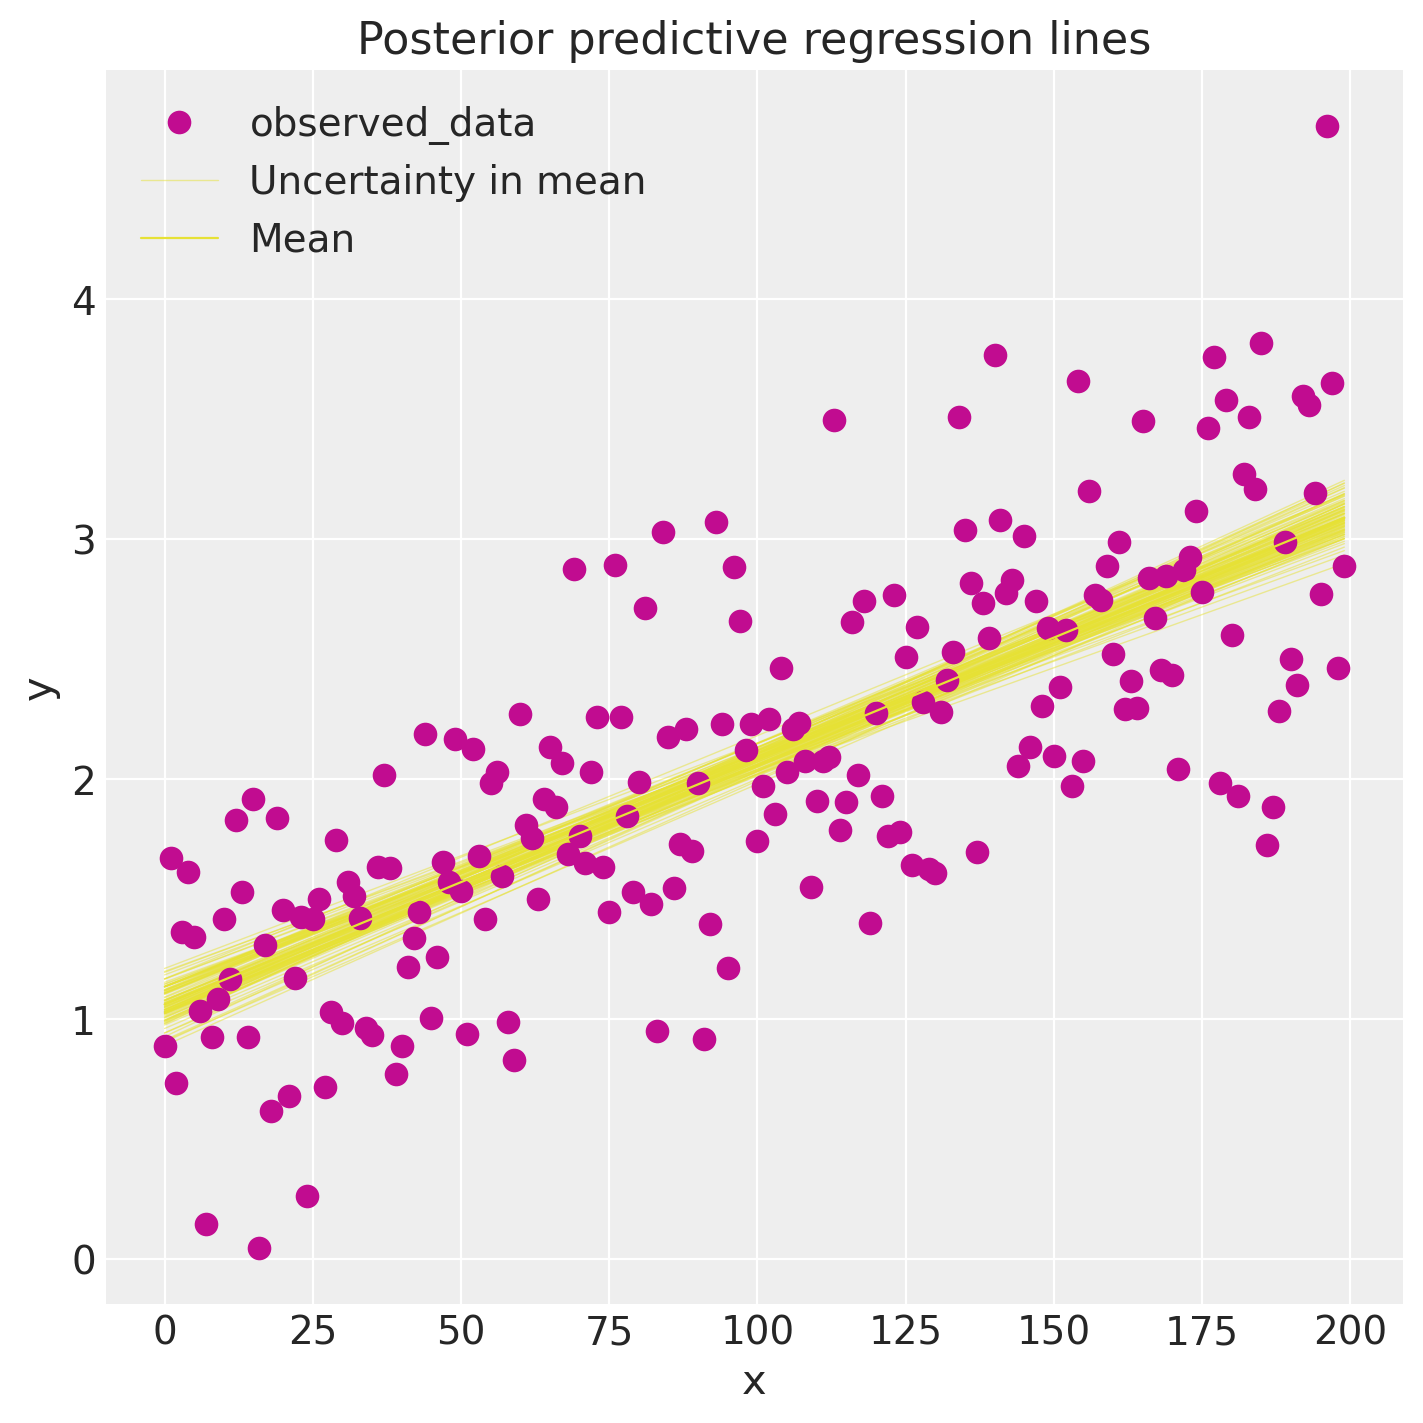

In [10]:
_, ax = plt.subplots(figsize=(7, 7))
az.plot_lm(idata=idata, y="y", num_samples=100, axes=ax, y_model="y_model")
ax.set_title("Posterior predictive regression lines")
ax.set_xlabel("x");